# Data Mining Project2

In [13]:
import csv
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import graphviz 
from graphviz import render
from graphviz import Source
import warnings
warnings.filterwarnings("ignore")

## Step 1: Design a set of rules to classify data
The problem designed whether he/she is charming

there are 5 features for the problem
* `Height`
* `Weight`
* `Kindness` whether is kindness
* `IQ`
* `Smoker` - whether a smoker

the number of data = 10000

### Absolutely right rule
Height (>170cm), Weight(>50kg, <100kg), Kindness(yes), IQ(>80), Smoker(no) --->>> Charming

In [2]:
numberdata = 10000
data = np.zeros([numberdata, 5]) 
label = np.zeros(numberdata)

In [3]:
y=0
for i in range(1000):
    if i % 7 == 0 or i % 3 == 0:
        y+=1
        data[i][0] = round(random.uniform(160,210), 2)
        data[i][1] = random.randint(50,100)
        data[i][2] = 1 #'yes'
        data[i][3] = random.randint(80,200)
        data[i][4] = 0 #'no'
        label[i] = 1
    else:
        data[i][0] = round(random.uniform(150,170), 2)
        data[i][1] = random.choice([random.randint(35,50), random.randint(100,200)])
        data[i][2] = random.randint(0,1)
        data[i][3] = random.randint(30,120)
        data[i][4] = random.randint(0,1)

Write the features into `csv` format

In [4]:
with open('dataset_latest.csv', 'w', newline='') as csvfile:
    
    writer = csv.writer(csvfile)
    writer.writerow(['Height', 'Weight', 'Kindness', 'IQ', 'Smoker'])
    for i in range(numberdata):
         writer.writerow(data[i])

with open('label_latest.csv', 'w', newline='') as csvfile:
    
    writer = csv.writer(csvfile)
    writer.writerow(['Charming?'])
    for i in range(numberdata):
         writer.writerow([int(label[i])])

Load the data from the generated `.csv` file 

`dataset.csv` and `label.csv` are used instead of `dataset_latest.csv` and `label_latest.csv`
`dataset_latest.csv` and `label_latest.csv` above are showing how the data being generated 

In [5]:
X = []
with open('dataset.csv', 'r', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        X.append(row)
        
X = np.array(X[1:])

Y = []
with open('label.csv', 'r', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        Y.append(row)
        
Y = np.array(Y[1:])

Cross Validation
* training data = 67% 
* testing data = 33%

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6700, 5) (3300, 5) (6700, 1) (3300, 1)


## Step 2: Use the data generated in Step 1 to construct the classification model 
* Desicion Tree is used
    * Accuracy = 99% 


In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y = clf.predict(X_test)
print('Accuracy = ', accuracy_score(y, Y_test))

Accuracy =  1.0


Visualization with graphviz

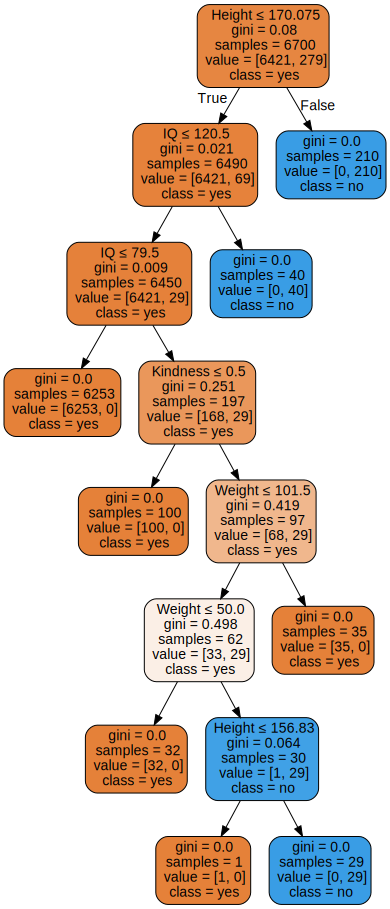

In [8]:
src = Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Height', 'Weight', 'Kindness', 'IQ', 'Smoker'],  
                     class_names=['yes', 'no'],  
                     filled=True, rounded=True,  
                     special_characters=True)   
graph = graphviz.Source(dot_data) 
graph.render("rule") 
graphviz.Source(dot_data) 

## Step 3: Compare the rules in the decision tree from Step 2 and the rules used to generate the  ‘absolutely right’ data 

### The absolutely right rule
* Height (>170cm) and Weight(>50kg, <100kg) and Kindness(yes) and IQ(>80) and Smoker(no) --->>> Charming(yes)

### The rule generated from the Decision Tree
* Height(<160.15) and Weight(<50.5) and Kindness(no) --->>> Charming(no)

### Discussion
The rule generated from the Decision Tree are similiar to The absolutely right rule

Since the data is generated randomly, there are affecting the final result 

In the result of Decision tree, the level of IQ and whether is a smoker are not included in the consideration of being Charming

## Step 4: Discuss anything you can 

### Random Forest
Accuracy of using Random Forest is 99.8% which is slightly lower than that of Decision Tree

In [17]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rf.fit(X_train, Y_train)
y_rf = clf_rf.predict(X_test)
print('Accuracy = ', accuracy_score(y_rf, Y_test))

Accuracy =  0.9981818181818182


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### SVC
Accuracy of using  SVC is 96.5% which is slightly lower than that of Decision Tree

In [10]:
classifier_svc = SVC(gamma='auto')
classifier_svc.fit(X_train, Y_train)
y_pred = classifier_svc.predict(X_test)
print('Accuracy = ', accuracy_score(y_pred, Y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.9651515151515152


### PCA to 2 dimension of features
the accuracy proves the PCA doesn't get much more help on Decision Tree

In [17]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_pca, Y_train)
y = clf.predict(X_test_pca)
print('Accuracy = ', accuracy_score(y, Y_test))

Accuracy =  0.9975757575757576


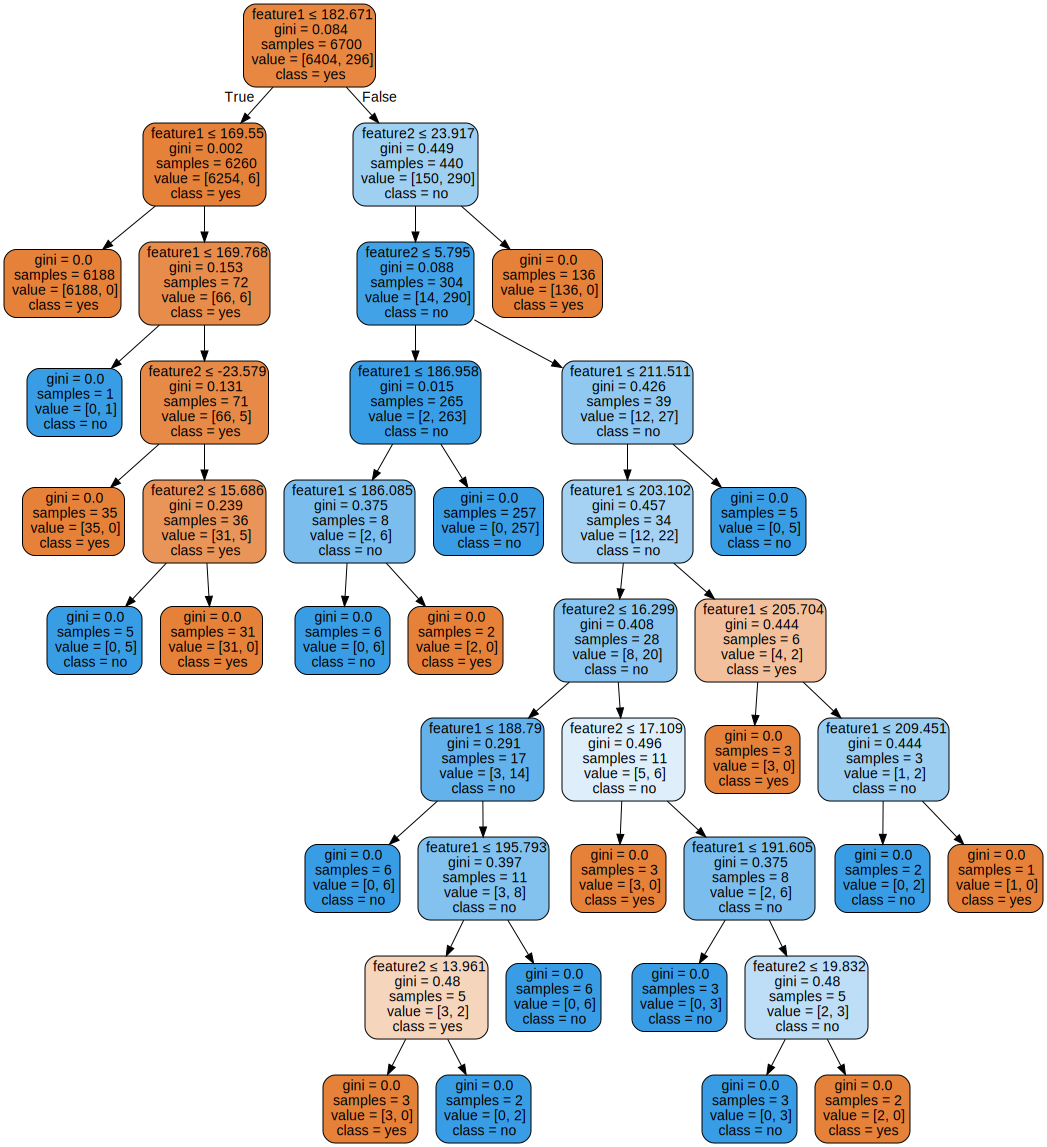

In [19]:
src = Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['feature1', 'feature2'],  
                     class_names=['yes', 'no'],  
                     filled=True, rounded=True,  
                     special_characters=True)   
graph = graphviz.Source(dot_data) 
graph.render("rule") 
graphviz.Source(dot_data) 

### Reference
* [Decision Tree and Random Forest](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)
* [A brief look at sklearn.tree.DecisionTreeClassifier](https://hackernoon.com/a-brief-look-at-sklearn-tree-decisiontreeclassifier-c2ee262eab9a)